We'll try this with cartopy (smaller and smoother than basemap?). Let's start by plotting a map:

Credits <http://www.geophysique.be/2014/02/25/shaded-relief-map-in-python/>

It turns out it works differently now:

<http://scitools.org.uk/cartopy/docs/latest/examples/srtm_shading.html>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
from cartopy.io.srtm import srtm_composite

In [5]:
%matplotlib inline

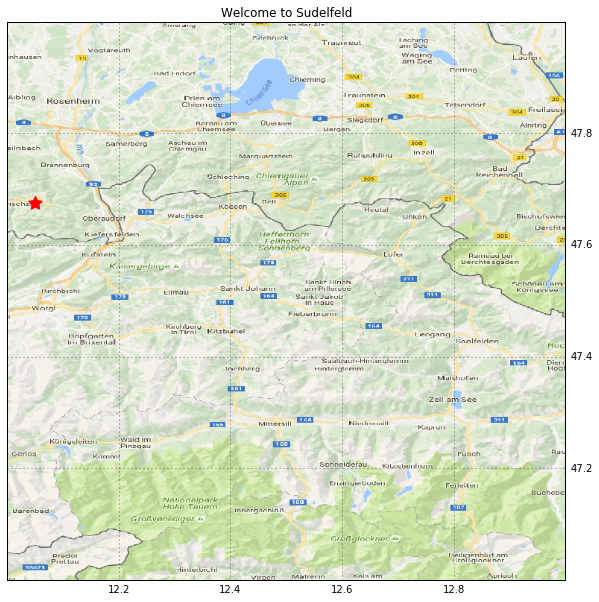

In [6]:
# Specify a region of interest, in this case, Sudelfeld Ski Resort (Germany)
lat = 47 + 40 / 60.0 + 30 / 3600.
lon = 12 + 3 / 60.0 + 2 / 3600.

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([12.0, 13.0, 47.0, 48.0])
gg_tiles = GoogleTiles()
ax.add_image(gg_tiles, 10)

plt.scatter(lon, lat, marker=(5, 1), color='red', s=200)
plt.title("Welcome to Sudelfeld")
gl = ax.gridlines(draw_labels=True,)
gl.xlabels_top = False
gl.ylabels_left = False

In [8]:
from cartopy.io.srtm import SRTM3Source, SRTM1Source

In [9]:
SRTM1Source()

In [28]:
import cartopy.io.srtm

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.srtm import SRTM3Source

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
# Define a raster source which uses the SRTM data and applies the
# shade function when the data is retrieved.
raster = SRTM3Source()
# Add the shaded SRTM source to our map with a grayscale colormap.
ax.add_raster(raster, cmap='Greys')
ax.set_extent([12, 13, 47, 48])
plt.show()

C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://e4ftl01.cr.usgs.gov/SRTM/SRTMGL3.003/2000.02.11/N47E012.SRTMGL3.hgt.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


HTTPError: HTTP Error 401: Unauthorized

In [14]:
%debug

> c:\anaconda3\lib\urllib\request.py(590)http_error_default()
    588 class HTTPDefaultErrorHandler(BaseHandler):
    589     def http_error_default(self, req, fp, code, msg, hdrs):
--> 590         raise HTTPError(req.full_url, code, msg, hdrs, fp)
    591 
    592 class HTTPRedirectHandler(BaseHandler):

ipdb> a
self = <urllib.request.HTTPDefaultErrorHandler object at 0x00000000095F5630>
req = <urllib.request.Request object at 0x000000000B3FEE80>
fp = <http.client.HTTPResponse object at 0x000000000B3FEF28>
code = 401
msg = 'Unauthorized'
hdrs = <http.client.HTTPMessage object at 0x000000000B408400>
ipdb> u
> c:\anaconda3\lib\urllib\request.py(444)_call_chain()
    442         for handler in handlers:
    443             func = getattr(handler, meth_name)
--> 444             result = func(*args)
    445             if result is not None:
    446                 return result

ipdb> a
self = <urllib.request.OpenerDirector object at 0x00000000095F54E0>
chain = {'default': [<urllib.reques

In [19]:
import urllib

url = 'http://e4ftl01.cr.usgs.gov/SRTM/SRTMGL1.003/2000.02.11/N47E012.SRTMGL1.hgt.zip'

urllib.request.urlopen(url)

In [23]:
import requests
r = requests.get(url)  

In [24]:
r

<Response [401]>

In [25]:
import cartopy.crs as ccrs
from cartopy.io import srtm
import matplotlib.pyplot as plt

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io.srtm import SRTM3Source, SRTM1Source


def shade(located_elevations):
    """
    Given an array of elevations in a LocatedImage, add a relief (shadows) to
    give a realistic 3d appearance.

    """
    new_img = srtm.add_shading(located_elevations.image,
                               azimuth=135, altitude=15)
    return LocatedImage(new_img, located_elevations.extent)


def plot(Source, name):
    plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Define a raster source which uses the SRTM data and applies the
    # shade function when the data is retrieved.
    shaded_srtm = PostprocessedRasterSource(Source(), shade)

    # Add the shaded SRTM source to our map with a grayscale colormap.
    ax.add_raster(shaded_srtm, cmap='Greys')

    # This data is high resolution, so pick a small area which has some
    # interesting orography.
    ax.set_extent([12, 13, 47, 48])

    plt.title(name + " Shaded Relief Map")

    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = False


def main():
    plot(SRTM3Source, 'SRTM3')
    plot(SRTM1Source, 'SRTM1')

    plt.show()

In [26]:
main()

C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://e4ftl01.cr.usgs.gov/SRTM/SRTMGL3.003/2000.02.11/N47E012.SRTMGL3.hgt.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


HTTPError: HTTP Error 401: Unauthorized

C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://e4ftl01.cr.usgs.gov/SRTM/SRTMGL1.003/2000.02.11/N47E012.SRTMGL1.hgt.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


HTTPError: HTTP Error 401: Unauthorized

Interim status:

- cartopy using SRTM should but does not work (I've filed an issue there)
- installing basemap is an option (and then exploiting hte shadedrelief elevation map)
- retrieving elevations from google is also an option (but less nice)